# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [5]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:23<00:00, 2.51KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

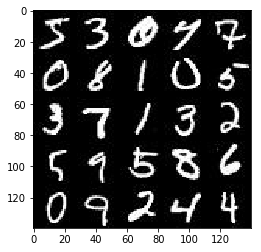

In [8]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

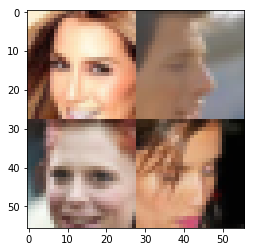

In [39]:
show_n_images = 5

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [40]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/Users/reddyv/miniconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [41]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    image_placeholder = tf.placeholder(tf.float32,shape=(None,image_width,
                    image_height,image_channels))
    

    return image_placeholder, tf.placeholder(tf.float32,shape=(None,z_dim)), tf.placeholder(tf.float32)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [42]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.01
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
       
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
       
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
    
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [43]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.01
    with tf.variable_scope('generator', reuse=not is_train):
        
        fc1 = tf.layers.dense(z, 7*7*256)
        
        x1 = tf.reshape(fc1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.nn.relu(x1)

        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='SAME')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.nn.relu(x2)

        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='SAME')
        out = tf.tanh(logits)

        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [49]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    
    _,d_logits_real = discriminator(input_real, reuse=False)
    d_loss_real = tf.reduce_mean(
                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                          labels=tf.ones_like(d_logits_real) * (1 - smooth)))
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    _,d_logits_fake = discriminator(g_model, reuse=True)
    d_loss_fake = tf.reduce_mean(
                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                          labels=tf.zeros_like(d_logits_real)))
    
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(
             tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                     labels=tf.ones_like(d_logits_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [62]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Optimizers

    # Get the trainable_variables, split into G and D parts
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    all_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    g_update_ops = [var for var in all_update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in all_update_ops if var.name.startswith('discriminator')]

    with tf.control_dependencies(d_update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = d_vars)

    with tf.control_dependencies(g_update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = g_vars)
   
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [52]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [71]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    print_every = 10
    show_every = 100
    steps = 0
    
    # Inputs
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    # Loss
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    # Optimizers
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images = batch_images*2 
                
                #Random Noise to feed into G
                batch_z = np.random.uniform(-1, 1, size=(batch_size,z_dim))

                #Run Optimizers
                _ = sess.run(d_opt, feed_dict={input_real:batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z:batch_z})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                      "Discriminator Loss: {:.4f}...".format(train_loss_d),
                      "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 10, input_z, data_shape[3], data_image_mode)

                steps +=1

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 7.4468... Generator Loss: 0.0037


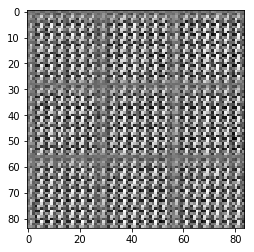

Epoch 1/2... Discriminator Loss: 4.6962... Generator Loss: 10.2438
Epoch 1/2... Discriminator Loss: 1.2792... Generator Loss: 1.9863
Epoch 1/2... Discriminator Loss: 1.8314... Generator Loss: 1.8752
Epoch 1/2... Discriminator Loss: 1.8023... Generator Loss: 1.6848
Epoch 1/2... Discriminator Loss: 1.6540... Generator Loss: 1.4577
Epoch 1/2... Discriminator Loss: 1.6342... Generator Loss: 1.4068
Epoch 1/2... Discriminator Loss: 1.4009... Generator Loss: 1.3216
Epoch 1/2... Discriminator Loss: 1.5074... Generator Loss: 1.5511
Epoch 1/2... Discriminator Loss: 1.4927... Generator Loss: 1.3808
Epoch 1/2... Discriminator Loss: 1.3977... Generator Loss: 1.5807


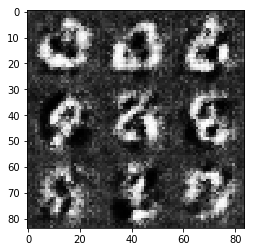

Epoch 1/2... Discriminator Loss: 1.3216... Generator Loss: 1.6373
Epoch 1/2... Discriminator Loss: 1.2733... Generator Loss: 1.2272
Epoch 1/2... Discriminator Loss: 1.3463... Generator Loss: 1.2095
Epoch 1/2... Discriminator Loss: 1.4030... Generator Loss: 1.6992
Epoch 1/2... Discriminator Loss: 1.5028... Generator Loss: 1.6174
Epoch 1/2... Discriminator Loss: 1.3160... Generator Loss: 1.1508
Epoch 1/2... Discriminator Loss: 1.5133... Generator Loss: 1.9688
Epoch 1/2... Discriminator Loss: 1.6227... Generator Loss: 1.9356
Epoch 1/2... Discriminator Loss: 1.6547... Generator Loss: 2.0081
Epoch 1/2... Discriminator Loss: 1.3609... Generator Loss: 1.5621


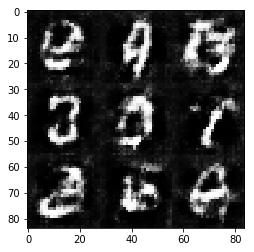

Epoch 1/2... Discriminator Loss: 1.1759... Generator Loss: 1.7403
Epoch 1/2... Discriminator Loss: 1.4306... Generator Loss: 1.4617
Epoch 1/2... Discriminator Loss: 1.4247... Generator Loss: 1.9089
Epoch 1/2... Discriminator Loss: 1.4030... Generator Loss: 1.6332
Epoch 1/2... Discriminator Loss: 1.2445... Generator Loss: 1.4447
Epoch 1/2... Discriminator Loss: 1.5918... Generator Loss: 2.0451
Epoch 1/2... Discriminator Loss: 1.1643... Generator Loss: 1.1554
Epoch 1/2... Discriminator Loss: 1.2861... Generator Loss: 1.7302
Epoch 1/2... Discriminator Loss: 1.2447... Generator Loss: 1.2991
Epoch 1/2... Discriminator Loss: 1.1686... Generator Loss: 1.3774


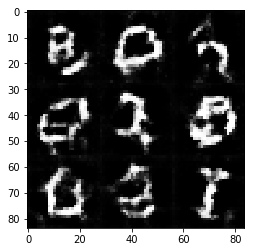

Epoch 1/2... Discriminator Loss: 1.0228... Generator Loss: 1.4336
Epoch 1/2... Discriminator Loss: 1.0764... Generator Loss: 1.3149
Epoch 1/2... Discriminator Loss: 1.1457... Generator Loss: 1.2701
Epoch 1/2... Discriminator Loss: 1.2241... Generator Loss: 1.5563
Epoch 1/2... Discriminator Loss: 1.4623... Generator Loss: 2.1088
Epoch 1/2... Discriminator Loss: 1.2173... Generator Loss: 1.6969
Epoch 1/2... Discriminator Loss: 1.0299... Generator Loss: 1.5147
Epoch 1/2... Discriminator Loss: 1.0268... Generator Loss: 1.8490
Epoch 1/2... Discriminator Loss: 1.2902... Generator Loss: 1.7529
Epoch 1/2... Discriminator Loss: 1.1158... Generator Loss: 1.3228


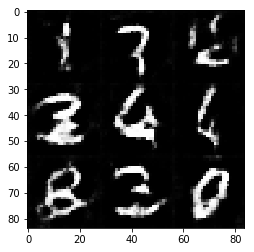

Epoch 1/2... Discriminator Loss: 1.2053... Generator Loss: 1.7752
Epoch 1/2... Discriminator Loss: 1.1112... Generator Loss: 1.4872
Epoch 1/2... Discriminator Loss: 1.5643... Generator Loss: 1.8813
Epoch 1/2... Discriminator Loss: 1.2077... Generator Loss: 1.1345
Epoch 1/2... Discriminator Loss: 1.0775... Generator Loss: 1.3401
Epoch 1/2... Discriminator Loss: 1.2944... Generator Loss: 1.9605
Epoch 1/2... Discriminator Loss: 1.2667... Generator Loss: 1.0429
Epoch 1/2... Discriminator Loss: 1.6044... Generator Loss: 2.1867
Epoch 1/2... Discriminator Loss: 1.0296... Generator Loss: 1.3372
Epoch 1/2... Discriminator Loss: 1.3989... Generator Loss: 1.9938


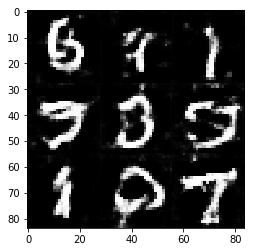

Epoch 1/2... Discriminator Loss: 1.1043... Generator Loss: 1.4255
Epoch 1/2... Discriminator Loss: 1.0721... Generator Loss: 1.7694
Epoch 1/2... Discriminator Loss: 1.0831... Generator Loss: 1.8074
Epoch 1/2... Discriminator Loss: 1.1340... Generator Loss: 0.7341
Epoch 1/2... Discriminator Loss: 1.5723... Generator Loss: 0.4154
Epoch 1/2... Discriminator Loss: 1.3354... Generator Loss: 0.5237
Epoch 1/2... Discriminator Loss: 2.3655... Generator Loss: 3.2093
Epoch 1/2... Discriminator Loss: 1.1158... Generator Loss: 1.4230
Epoch 1/2... Discriminator Loss: 1.1362... Generator Loss: 1.4397
Epoch 1/2... Discriminator Loss: 1.5411... Generator Loss: 0.4861


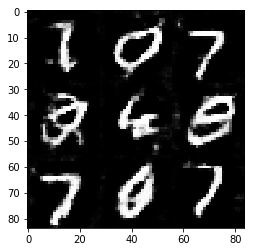

Epoch 1/2... Discriminator Loss: 1.5329... Generator Loss: 0.4538
Epoch 1/2... Discriminator Loss: 1.8705... Generator Loss: 0.2908
Epoch 1/2... Discriminator Loss: 0.8777... Generator Loss: 1.9049
Epoch 1/2... Discriminator Loss: 1.7844... Generator Loss: 2.3758
Epoch 1/2... Discriminator Loss: 1.0935... Generator Loss: 1.2222
Epoch 1/2... Discriminator Loss: 1.1497... Generator Loss: 0.7265
Epoch 1/2... Discriminator Loss: 1.4065... Generator Loss: 1.9843
Epoch 1/2... Discriminator Loss: 1.0595... Generator Loss: 1.9682
Epoch 1/2... Discriminator Loss: 1.0012... Generator Loss: 1.5021
Epoch 1/2... Discriminator Loss: 1.0266... Generator Loss: 1.5544


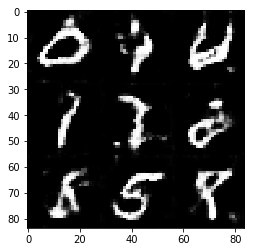

Epoch 1/2... Discriminator Loss: 1.1383... Generator Loss: 1.6425
Epoch 1/2... Discriminator Loss: 1.0951... Generator Loss: 1.7303
Epoch 1/2... Discriminator Loss: 0.8766... Generator Loss: 1.3875
Epoch 1/2... Discriminator Loss: 0.9734... Generator Loss: 2.0663
Epoch 1/2... Discriminator Loss: 0.9619... Generator Loss: 1.3437
Epoch 1/2... Discriminator Loss: 0.8060... Generator Loss: 1.8206
Epoch 1/2... Discriminator Loss: 1.7861... Generator Loss: 2.3237
Epoch 1/2... Discriminator Loss: 1.4535... Generator Loss: 2.1832
Epoch 1/2... Discriminator Loss: 1.0497... Generator Loss: 1.5412
Epoch 1/2... Discriminator Loss: 0.9977... Generator Loss: 1.8157


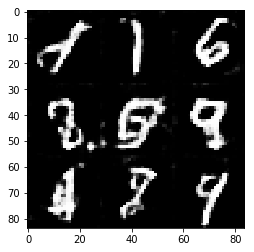

Epoch 1/2... Discriminator Loss: 0.7922... Generator Loss: 1.5810
Epoch 1/2... Discriminator Loss: 1.0919... Generator Loss: 1.3084
Epoch 1/2... Discriminator Loss: 0.9377... Generator Loss: 1.7088
Epoch 1/2... Discriminator Loss: 2.1133... Generator Loss: 0.2553
Epoch 1/2... Discriminator Loss: 1.1008... Generator Loss: 0.8112
Epoch 1/2... Discriminator Loss: 1.4743... Generator Loss: 3.2817
Epoch 1/2... Discriminator Loss: 1.3974... Generator Loss: 0.5137
Epoch 1/2... Discriminator Loss: 1.1717... Generator Loss: 0.6847
Epoch 1/2... Discriminator Loss: 1.8519... Generator Loss: 0.3495
Epoch 1/2... Discriminator Loss: 1.3286... Generator Loss: 0.5739


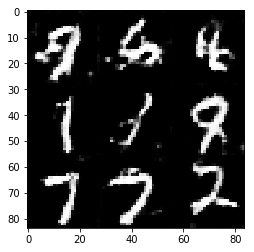

Epoch 1/2... Discriminator Loss: 1.5556... Generator Loss: 0.4320
Epoch 1/2... Discriminator Loss: 1.2798... Generator Loss: 0.5787
Epoch 1/2... Discriminator Loss: 1.3293... Generator Loss: 0.6242
Epoch 2/2... Discriminator Loss: 1.6398... Generator Loss: 2.5035
Epoch 2/2... Discriminator Loss: 1.3854... Generator Loss: 0.5133
Epoch 2/2... Discriminator Loss: 1.6769... Generator Loss: 0.3712
Epoch 2/2... Discriminator Loss: 1.9460... Generator Loss: 0.2766
Epoch 2/2... Discriminator Loss: 1.3565... Generator Loss: 0.5761
Epoch 2/2... Discriminator Loss: 1.0140... Generator Loss: 1.2854
Epoch 2/2... Discriminator Loss: 1.3726... Generator Loss: 1.7476


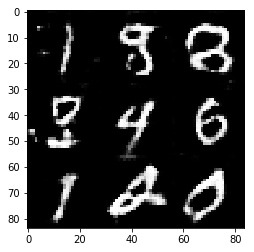

Epoch 2/2... Discriminator Loss: 1.7642... Generator Loss: 2.4804
Epoch 2/2... Discriminator Loss: 1.1189... Generator Loss: 0.8237
Epoch 2/2... Discriminator Loss: 1.4306... Generator Loss: 0.5378
Epoch 2/2... Discriminator Loss: 1.6582... Generator Loss: 0.3744
Epoch 2/2... Discriminator Loss: 1.0531... Generator Loss: 0.8217
Epoch 2/2... Discriminator Loss: 1.4337... Generator Loss: 0.5004
Epoch 2/2... Discriminator Loss: 1.0514... Generator Loss: 0.8229
Epoch 2/2... Discriminator Loss: 1.0675... Generator Loss: 1.3158
Epoch 2/2... Discriminator Loss: 0.8417... Generator Loss: 1.1696
Epoch 2/2... Discriminator Loss: 1.9807... Generator Loss: 2.5479


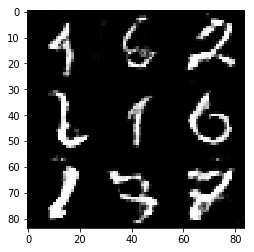

Epoch 2/2... Discriminator Loss: 0.7998... Generator Loss: 1.4545
Epoch 2/2... Discriminator Loss: 0.9009... Generator Loss: 1.3479
Epoch 2/2... Discriminator Loss: 0.7464... Generator Loss: 1.7071
Epoch 2/2... Discriminator Loss: 0.8203... Generator Loss: 1.3003
Epoch 2/2... Discriminator Loss: 1.1461... Generator Loss: 2.4392
Epoch 2/2... Discriminator Loss: 1.5979... Generator Loss: 2.9013
Epoch 2/2... Discriminator Loss: 1.1641... Generator Loss: 0.8672
Epoch 2/2... Discriminator Loss: 2.0811... Generator Loss: 3.3983
Epoch 2/2... Discriminator Loss: 0.8177... Generator Loss: 1.3437
Epoch 2/2... Discriminator Loss: 0.8198... Generator Loss: 1.8268


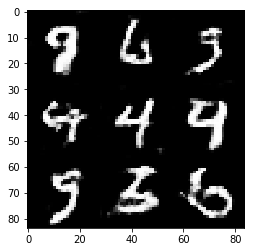

Epoch 2/2... Discriminator Loss: 0.9577... Generator Loss: 2.1048
Epoch 2/2... Discriminator Loss: 0.8724... Generator Loss: 1.2429
Epoch 2/2... Discriminator Loss: 1.5319... Generator Loss: 2.4385
Epoch 2/2... Discriminator Loss: 1.1261... Generator Loss: 1.7308
Epoch 2/2... Discriminator Loss: 0.7509... Generator Loss: 1.6533
Epoch 2/2... Discriminator Loss: 1.7128... Generator Loss: 0.3999
Epoch 2/2... Discriminator Loss: 0.8644... Generator Loss: 1.1336
Epoch 2/2... Discriminator Loss: 0.8968... Generator Loss: 1.1602
Epoch 2/2... Discriminator Loss: 1.1929... Generator Loss: 2.4070
Epoch 2/2... Discriminator Loss: 0.9393... Generator Loss: 1.8930


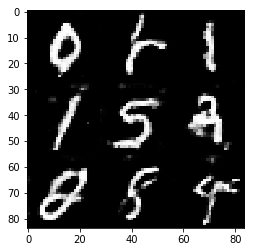

Epoch 2/2... Discriminator Loss: 1.8071... Generator Loss: 0.3790
Epoch 2/2... Discriminator Loss: 1.2218... Generator Loss: 0.6880
Epoch 2/2... Discriminator Loss: 1.5098... Generator Loss: 0.5070
Epoch 2/2... Discriminator Loss: 1.1373... Generator Loss: 0.7322
Epoch 2/2... Discriminator Loss: 1.1511... Generator Loss: 2.3848
Epoch 2/2... Discriminator Loss: 1.0017... Generator Loss: 1.6402
Epoch 2/2... Discriminator Loss: 0.7026... Generator Loss: 1.9833
Epoch 2/2... Discriminator Loss: 0.9169... Generator Loss: 2.0171
Epoch 2/2... Discriminator Loss: 1.1098... Generator Loss: 0.8356
Epoch 2/2... Discriminator Loss: 2.1355... Generator Loss: 0.2635


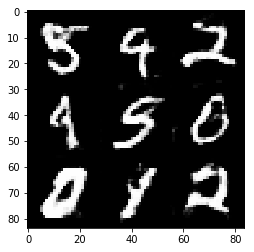

Epoch 2/2... Discriminator Loss: 1.3565... Generator Loss: 0.6231
Epoch 2/2... Discriminator Loss: 1.9905... Generator Loss: 0.3061
Epoch 2/2... Discriminator Loss: 0.8310... Generator Loss: 1.8554
Epoch 2/2... Discriminator Loss: 0.7044... Generator Loss: 1.6187
Epoch 2/2... Discriminator Loss: 0.8895... Generator Loss: 1.6811
Epoch 2/2... Discriminator Loss: 0.9719... Generator Loss: 1.9684
Epoch 2/2... Discriminator Loss: 0.8020... Generator Loss: 1.8041
Epoch 2/2... Discriminator Loss: 0.7516... Generator Loss: 1.8838
Epoch 2/2... Discriminator Loss: 0.8936... Generator Loss: 1.1710
Epoch 2/2... Discriminator Loss: 1.8681... Generator Loss: 0.3528


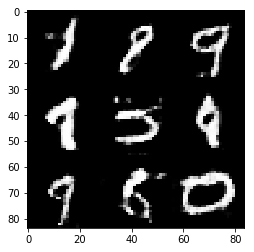

Epoch 2/2... Discriminator Loss: 1.4363... Generator Loss: 0.5294
Epoch 2/2... Discriminator Loss: 1.5345... Generator Loss: 0.4486
Epoch 2/2... Discriminator Loss: 1.6908... Generator Loss: 0.4040
Epoch 2/2... Discriminator Loss: 1.4274... Generator Loss: 0.5465
Epoch 2/2... Discriminator Loss: 1.0082... Generator Loss: 0.9608
Epoch 2/2... Discriminator Loss: 0.8409... Generator Loss: 1.6205
Epoch 2/2... Discriminator Loss: 0.6358... Generator Loss: 1.8342
Epoch 2/2... Discriminator Loss: 0.8651... Generator Loss: 1.5891
Epoch 2/2... Discriminator Loss: 2.0201... Generator Loss: 3.1928
Epoch 2/2... Discriminator Loss: 0.9104... Generator Loss: 1.2793


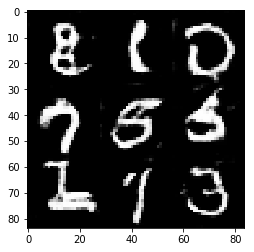

Epoch 2/2... Discriminator Loss: 1.7164... Generator Loss: 0.3836
Epoch 2/2... Discriminator Loss: 0.9431... Generator Loss: 0.9685
Epoch 2/2... Discriminator Loss: 1.2978... Generator Loss: 0.7517
Epoch 2/2... Discriminator Loss: 1.7940... Generator Loss: 0.3479
Epoch 2/2... Discriminator Loss: 0.9741... Generator Loss: 0.9835
Epoch 2/2... Discriminator Loss: 0.9591... Generator Loss: 1.0047
Epoch 2/2... Discriminator Loss: 1.4595... Generator Loss: 2.5063
Epoch 2/2... Discriminator Loss: 1.6333... Generator Loss: 0.4523
Epoch 2/2... Discriminator Loss: 0.6861... Generator Loss: 1.5789
Epoch 2/2... Discriminator Loss: 0.8562... Generator Loss: 1.2642


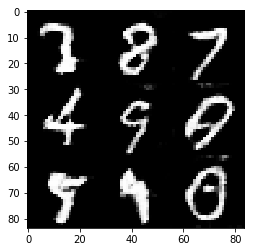

Epoch 2/2... Discriminator Loss: 1.7067... Generator Loss: 2.9727
Epoch 2/2... Discriminator Loss: 0.9280... Generator Loss: 1.6247
Epoch 2/2... Discriminator Loss: 0.8816... Generator Loss: 1.9041
Epoch 2/2... Discriminator Loss: 1.6566... Generator Loss: 0.4854
Epoch 2/2... Discriminator Loss: 0.9635... Generator Loss: 0.9874
Epoch 2/2... Discriminator Loss: 1.9756... Generator Loss: 3.7247
Epoch 2/2... Discriminator Loss: 1.0581... Generator Loss: 1.1691
Epoch 2/2... Discriminator Loss: 0.8609... Generator Loss: 1.5115
Epoch 2/2... Discriminator Loss: 0.8615... Generator Loss: 1.2275
Epoch 2/2... Discriminator Loss: 1.5517... Generator Loss: 0.4534


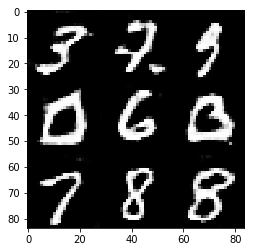

Epoch 2/2... Discriminator Loss: 1.0447... Generator Loss: 1.0528
Epoch 2/2... Discriminator Loss: 2.5352... Generator Loss: 0.1818
Epoch 2/2... Discriminator Loss: 0.8532... Generator Loss: 1.1407
Epoch 2/2... Discriminator Loss: 0.8381... Generator Loss: 2.0941
Epoch 2/2... Discriminator Loss: 1.0065... Generator Loss: 2.0349
Epoch 2/2... Discriminator Loss: 1.3591... Generator Loss: 0.6929
Epoch 2/2... Discriminator Loss: 0.8496... Generator Loss: 1.7639


NameError: name 'saver' is not defined

In [64]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.05


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 9.6847... Generator Loss: 0.0004


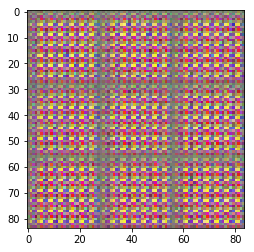

Epoch 1/1... Discriminator Loss: 0.8642... Generator Loss: 1.8348
Epoch 1/1... Discriminator Loss: 3.6691... Generator Loss: 4.6767
Epoch 1/1... Discriminator Loss: 1.6734... Generator Loss: 2.1001
Epoch 1/1... Discriminator Loss: 1.8634... Generator Loss: 2.6275
Epoch 1/1... Discriminator Loss: 1.2496... Generator Loss: 1.8053
Epoch 1/1... Discriminator Loss: 1.1212... Generator Loss: 3.4526
Epoch 1/1... Discriminator Loss: 2.8184... Generator Loss: 3.9105
Epoch 1/1... Discriminator Loss: 1.4104... Generator Loss: 1.2095
Epoch 1/1... Discriminator Loss: 1.6172... Generator Loss: 2.5944
Epoch 1/1... Discriminator Loss: 1.4322... Generator Loss: 1.6449


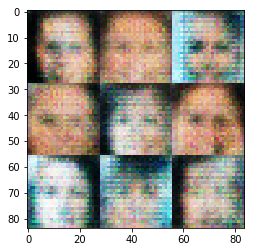

Epoch 1/1... Discriminator Loss: 0.8053... Generator Loss: 1.1073
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 0.9438
Epoch 1/1... Discriminator Loss: 1.4396... Generator Loss: 1.9255
Epoch 1/1... Discriminator Loss: 1.2031... Generator Loss: 1.2765
Epoch 1/1... Discriminator Loss: 0.9252... Generator Loss: 1.0731
Epoch 1/1... Discriminator Loss: 1.9491... Generator Loss: 2.1422
Epoch 1/1... Discriminator Loss: 1.3635... Generator Loss: 2.1140
Epoch 1/1... Discriminator Loss: 1.4422... Generator Loss: 0.8581
Epoch 1/1... Discriminator Loss: 0.9972... Generator Loss: 3.0320
Epoch 1/1... Discriminator Loss: 0.6711... Generator Loss: 1.5089


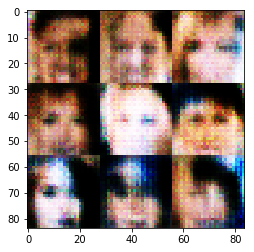

Epoch 1/1... Discriminator Loss: 0.5072... Generator Loss: 2.0371
Epoch 1/1... Discriminator Loss: 0.6643... Generator Loss: 1.4997
Epoch 1/1... Discriminator Loss: 1.5882... Generator Loss: 0.4339
Epoch 1/1... Discriminator Loss: 2.7968... Generator Loss: 4.4005
Epoch 1/1... Discriminator Loss: 0.8338... Generator Loss: 1.1020
Epoch 1/1... Discriminator Loss: 1.6242... Generator Loss: 0.4239
Epoch 1/1... Discriminator Loss: 0.6800... Generator Loss: 1.4411
Epoch 1/1... Discriminator Loss: 1.0551... Generator Loss: 0.9744
Epoch 1/1... Discriminator Loss: 1.7346... Generator Loss: 3.5001
Epoch 1/1... Discriminator Loss: 1.0037... Generator Loss: 1.1862


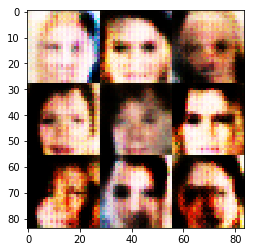

Epoch 1/1... Discriminator Loss: 0.4399... Generator Loss: 2.4735
Epoch 1/1... Discriminator Loss: 1.2446... Generator Loss: 0.7975
Epoch 1/1... Discriminator Loss: 1.1423... Generator Loss: 0.9547
Epoch 1/1... Discriminator Loss: 0.7874... Generator Loss: 1.2219
Epoch 1/1... Discriminator Loss: 1.8574... Generator Loss: 0.3628
Epoch 1/1... Discriminator Loss: 1.2935... Generator Loss: 0.6342
Epoch 1/1... Discriminator Loss: 0.8875... Generator Loss: 1.7544
Epoch 1/1... Discriminator Loss: 0.7317... Generator Loss: 1.2032
Epoch 1/1... Discriminator Loss: 1.1875... Generator Loss: 0.7352
Epoch 1/1... Discriminator Loss: 0.9572... Generator Loss: 1.0524


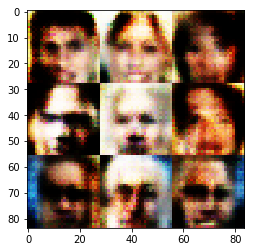

Epoch 1/1... Discriminator Loss: 0.6109... Generator Loss: 1.9905
Epoch 1/1... Discriminator Loss: 1.1380... Generator Loss: 1.1741
Epoch 1/1... Discriminator Loss: 1.1323... Generator Loss: 0.8071
Epoch 1/1... Discriminator Loss: 1.5779... Generator Loss: 3.6803
Epoch 1/1... Discriminator Loss: 0.6007... Generator Loss: 1.5648
Epoch 1/1... Discriminator Loss: 0.4748... Generator Loss: 3.2248
Epoch 1/1... Discriminator Loss: 2.5719... Generator Loss: 0.1884
Epoch 1/1... Discriminator Loss: 1.3942... Generator Loss: 1.5561
Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 1.3013
Epoch 1/1... Discriminator Loss: 1.2634... Generator Loss: 0.8704


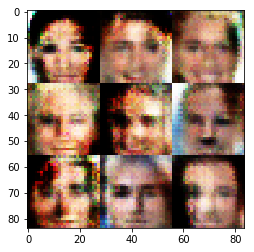

Epoch 1/1... Discriminator Loss: 1.1914... Generator Loss: 0.9513
Epoch 1/1... Discriminator Loss: 1.3431... Generator Loss: 1.1218
Epoch 1/1... Discriminator Loss: 1.2996... Generator Loss: 0.6022
Epoch 1/1... Discriminator Loss: 1.0476... Generator Loss: 3.0464
Epoch 1/1... Discriminator Loss: 0.7848... Generator Loss: 2.0579
Epoch 1/1... Discriminator Loss: 1.1865... Generator Loss: 2.1884
Epoch 1/1... Discriminator Loss: 1.1644... Generator Loss: 0.6739
Epoch 1/1... Discriminator Loss: 0.8786... Generator Loss: 2.7552
Epoch 1/1... Discriminator Loss: 1.1610... Generator Loss: 1.5001
Epoch 1/1... Discriminator Loss: 1.2218... Generator Loss: 1.0250


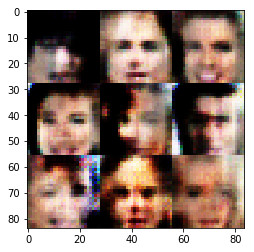

Epoch 1/1... Discriminator Loss: 0.7683... Generator Loss: 1.7433
Epoch 1/1... Discriminator Loss: 1.1708... Generator Loss: 1.5766
Epoch 1/1... Discriminator Loss: 1.1332... Generator Loss: 0.6444
Epoch 1/1... Discriminator Loss: 0.7771... Generator Loss: 1.7920
Epoch 1/1... Discriminator Loss: 1.9561... Generator Loss: 0.3036
Epoch 1/1... Discriminator Loss: 0.4858... Generator Loss: 2.3032
Epoch 1/1... Discriminator Loss: 2.5035... Generator Loss: 4.4786
Epoch 1/1... Discriminator Loss: 2.2632... Generator Loss: 1.9019
Epoch 1/1... Discriminator Loss: 0.8415... Generator Loss: 1.0752
Epoch 1/1... Discriminator Loss: 0.8548... Generator Loss: 1.0182


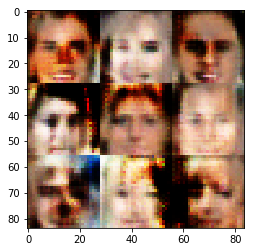

Epoch 1/1... Discriminator Loss: 1.6140... Generator Loss: 2.0861
Epoch 1/1... Discriminator Loss: 0.5355... Generator Loss: 2.5380
Epoch 1/1... Discriminator Loss: 1.3581... Generator Loss: 0.4893
Epoch 1/1... Discriminator Loss: 0.4527... Generator Loss: 2.3983
Epoch 1/1... Discriminator Loss: 0.5594... Generator Loss: 1.8326
Epoch 1/1... Discriminator Loss: 0.8391... Generator Loss: 1.0606
Epoch 1/1... Discriminator Loss: 0.8085... Generator Loss: 3.1396
Epoch 1/1... Discriminator Loss: 0.6963... Generator Loss: 1.3665
Epoch 1/1... Discriminator Loss: 0.7272... Generator Loss: 1.2669
Epoch 1/1... Discriminator Loss: 1.0965... Generator Loss: 0.6978


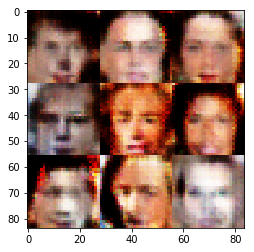

Epoch 1/1... Discriminator Loss: 0.8439... Generator Loss: 0.9564
Epoch 1/1... Discriminator Loss: 1.0753... Generator Loss: 1.1695
Epoch 1/1... Discriminator Loss: 0.4958... Generator Loss: 2.0522
Epoch 1/1... Discriminator Loss: 0.9835... Generator Loss: 2.0174
Epoch 1/1... Discriminator Loss: 0.4665... Generator Loss: 2.2619
Epoch 1/1... Discriminator Loss: 1.2007... Generator Loss: 1.1707


KeyboardInterrupt: 

In [72]:
batch_size = 100
z_dim = 100
learning_rate = .001
beta1 = 0.05


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.